In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
%cd 'drive/MyDrive/Colab Notebooks/tagpro_analysis'
%ls

/content/drive/MyDrive/Colab Notebooks/tagpro_analysis
'Copy of tp_scoreboard_analysis.ipynb'   __pycache__/             tp_analysis.py
 events/                                 sample_scoreboards.csv   tp_raw_event_reader.py
 maps/                                   scoreboards/             tp_scoreboard_analysis.ipynb
 matches/                                tp_analysis_prep.ipynb


# Tagpro scoreboard analysis

To read in all scoreboards, we use the scripts in the tp_analyses file. To read in all of the map information, we are going to read in the `bulkmaps.json` file.

In [3]:
import numpy as np
import pandas as pd

from pathlib import Path

In [4]:
%pip install ijson
import tp_analysis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 3.8 MB/s eta 0:00:00


In [5]:
matches_path = Path.cwd().joinpath('scoreboards/bulk_matches')
maps_path = Path.cwd().joinpath('maps/bulkmaps.json')

"""
scoreboards = tp_analysis.read_all_scoreboards(scoreboards_folder = matches_path)
scoreboards = scoreboards.rename({'map' : 'map_id'})

maps = pd.read_json(maps_path)
"""

"\nscoreboards = tp_analysis.read_all_scoreboards(scoreboards_folder = matches_path)\nscoreboards = scoreboards.rename({'map' : 'map_id'})\n\nmaps = pd.read_json(maps_path)\n"

In [ ]:
#scoreboards.sample(1000).to_csv('sample_scoreboards.csv')

In [6]:
scoreboards = pd.read_csv('sample_scoreboards.csv')

First, we want to filter only down to public matches. There isn't a public match tag in the dataset, but we go ahead and filter based on which map is being used to avoid any events, etc. We can do this by merging with the maps dataframe and only using those scoreboards with a mach in the maps dataframe.

In [ ]:
#scoreboards = pd.merge(scoreboards, maps, on = 'map_id', how = 'left')

We receive back a pandas dataframe with all of the events and all of the scoreboards of the players from the target matches.

Accessing player data is a matter of filtering the dataframe to the subset we need. Let's start by taking a look at the kind of data that we have available by summarizing the scoreboards.

In [7]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   name              1000 non-null   object 
 2   name_reserved     1000 non-null   bool   
 3   degree            1000 non-null   int64  
 4   match_id          1000 non-null   int64  
 5   date              1000 non-null   int64  
 6   datetime          1000 non-null   object 
 7   map               1000 non-null   int64  
 8   team              1000 non-null   int64  
 9   duration          1000 non-null   int64  
 10  grabs             1000 non-null   int64  
 11  hold_total        1000 non-null   int64  
 12  holds             1000 non-null   object 
 13  captures          1000 non-null   int64  
 14  tags              1000 non-null   int64  
 15  returns           1000 non-null   int64  
 16  kisses            1000 non-null   int64  
 

In [8]:
scoreboards.sample(10)

,Unnamed: 0,name,name_reserved,degree,match_id,date,datetime,map,team,duration,...,pups,pup_jj,pup_rb,pup_tp,pup_jj_time,pup_rb_time,pup_tp_times,playtime,final_team_score,win_loss
45,1164701,Mystery Box,True,0,3459189,1684872177,2023-05-23 20:02:57,14996,1,21602,...,0,0,0,0,0,0,0,21602,1,0.0
134,3884479,elephant,False,40,3281824,1662929821,2022-09-11 20:57:01,6,1,21602,...,3,1,2,0,1200,1797,0,21602,3,1.0
401,930754,~zion~,True,278,3431039,1681760487,2023-04-17 19:41:27,13390,2,2547,...,0,0,0,0,0,0,0,2547,3,1.0
440,3930906,Monte.,True,0,3287377,1663584084,2022-09-19 10:41:24,14752,2,36002,...,3,2,1,0,2636,399,0,36002,7,1.0
494,5361548,a virgin dad,True,0,2958089,1627333448,2021-07-26 21:04:08,14734,2,21604,...,1,1,0,0,1200,0,0,21604,1,0.0
464,4562757,VeganCheese,True,28,2862579,1618324767,2021-04-13 14:39:27,14267,1,16001,...,0,0,0,0,0,0,0,15591,4,1.0
559,1134447,Wildflower,False,345,3455500,1684343662,2023-05-17 17:14:22,17067,2,21603,...,0,0,0,0,0,0,0,21603,6,1.0
198,5170399,mr helder,True,65,2935423,1624849205,2021-06-28 03:00:05,6,1,9731,...,2,2,0,0,2400,0,0,8901,1,0.0
174,105549,Bum Saul,False,145,3332554,1669502809,2022-11-26 22:46:49,14991,2,21603,...,0,0,0,0,0,0,0,21603,2,0.0
274,5448989,Dors,True,0,2968419,1628499115,2021-08-09 08:51:55,18,2,21604,...,0,0,0,0,0,0,0,21604,4,0.0


For this dataset, we want to filter down to just the players with verified, reserved names. In Tagpro, reserved names refer to the name on a player's account. By tracking players' reserved names across matches, we can track the performance of an individual players across matches. Note, in this dataset, we are only given the name a player uses in a match, which may not be their reserved name. This means that, for some players, we cannot track their performance across all matches. This still leaves a lot of data to work with, though we have significanlty less!

In [9]:
print(scoreboards.shape)
scoreboards_res = scoreboards[scoreboards['name_reserved'] == True]
print(scoreboards_res.shape)

(1000, 35)
(626, 35)


Now, let's take a look at the number of unique matches we have, the number of unique players using their verified names, and the number of different maps that we are analyzing.

We have a small number of matches that only contained players without a reserved name (i.e. the number of unique values in `match_id` is less than the total number of matches in `scoreboards`).

In [10]:
print(len(scoreboards_res['match_id'].unique()))
print(len(scoreboards_res['name'].unique()))
print(len(scoreboards_res['map'].unique()))

624
518
168


Let's start by finding the players with the most and least number of matches in our dataset. It would make sense for there to be a logrithmic curve: a small subset of players should be playing a lot of matches, and there should be a lot of players who only play a few matches.

In [11]:
scoreboards_num_matches = scoreboards_res.groupby('name').size().to_frame('count_matches').reset_index()
scoreboards_num_matches = scoreboards_num_matches.sort_values(by = 'count_matches', ascending = False)
scoreboards_num_matches['count_matches_rank'] = scoreboards_num_matches['count_matches'].rank(ascending = False)
scoreboards_num_matches

,name,count_matches,count_matches_rank
255,P-d0g,4,2.0
141,Gargantua,4,2.0
183,Jer32,4,2.0
517,~zion~,3,10.5
460,name333,3,10.5
...,...,...,...
220,MoGGee,1,303.5
219,MisterPeanut,1,303.5
218,MikeGee,1,303.5
217,Method Man,1,303.5


In [ ]:
from plotnine import *

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-e36b44751b17>", line 1, in <cell line: 1>
    from plotnine import *
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceb

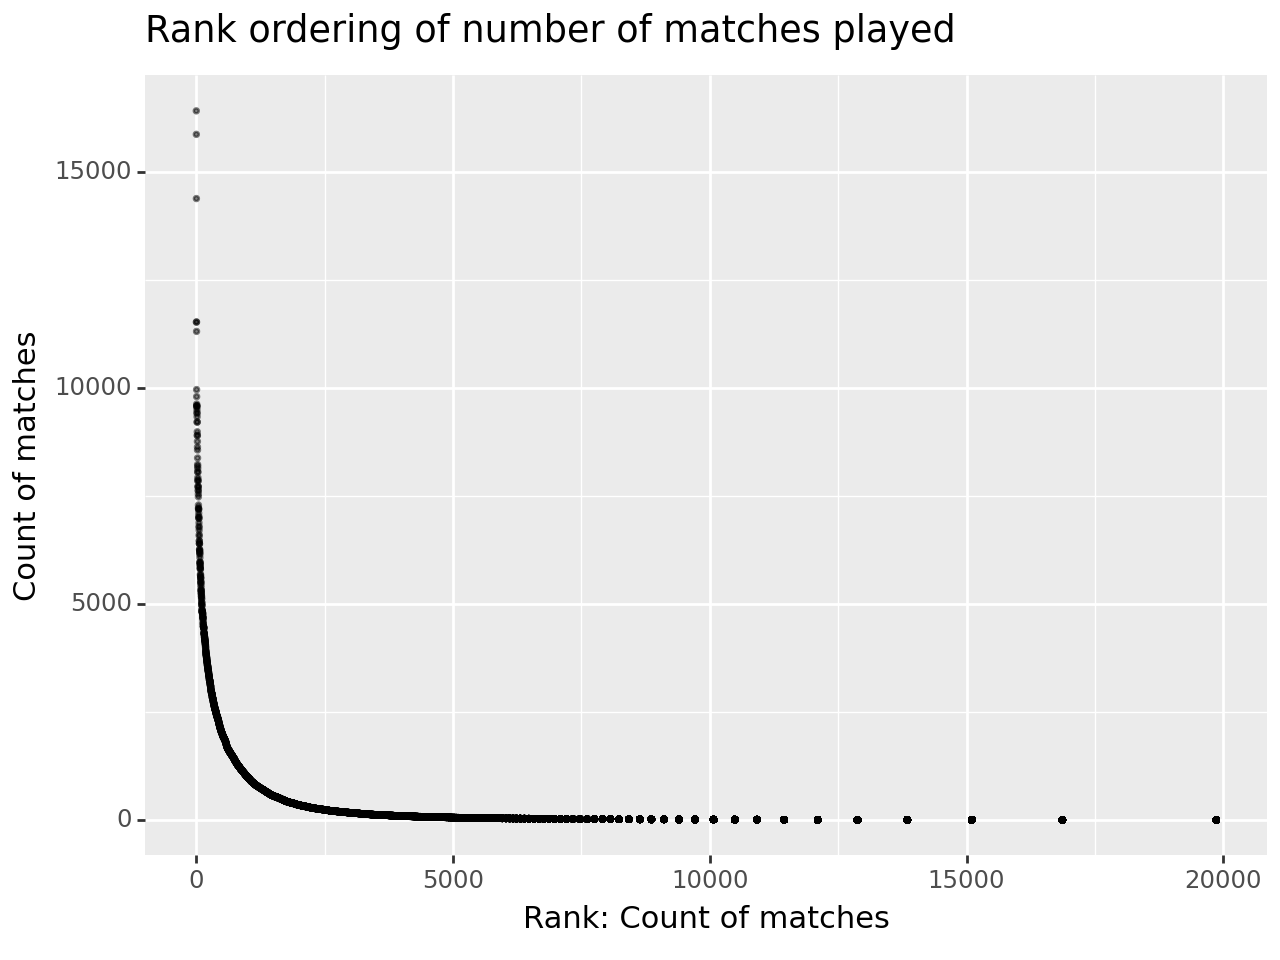

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(scoreboards_num_matches, aes(x = 'count_matches_rank', y = 'count_matches')) +
 geom_point(alpha = 0.5, size = 0.5) +
 labs(x = 'Rank: Count of matches', y = 'Count of matches', title = 'Rank ordering of number of matches played')
)

Let's then go ahead and see what factors affect a player's winrate. To start, let's go ahead and get some summary information for each player.

In [ ]:
scoreboards_res_sum = scoreboards_res.groupby('name').agg({'grabs': 'mean',
                                                           'hold_total': 'mean',
                                                           'captures' : 'mean',
                                                           'tags' : 'mean',
                                                           'returns' : 'mean',
                                                           'kisses' : 'mean',
                                                           'drops' : 'mean',
                                                           'pops' : 'mean',
                                                           'pups' : 'mean',
                                                           'playtime' : 'mean',
                                                           'win_loss' : 'mean'}).reset_index()

Let's go ahead and filter the dataset so we are looking at players with at least 300 matches, and then take a look at the players with high and low winrates.

In [ ]:
scoreboards_res_sum = scoreboards_res_sum.merge(scoreboards_num_matches, on = 'name') # Merge dataframes with total matches count
scoreboards_res_sum = scoreboards_res_sum[scoreboards_res_sum['count_matches'] >= 300]

scoreboards_res_sum = scoreboards_res_sum.sort_values(by = 'win_loss', ascending = False)
scoreboards_res_sum['win_loss_rank'] = scoreboards_res_sum['win_loss'].rank(ascending = False)
scoreboards_res_sum

,name,grabs,hold_total,captures,tags,returns,kisses,drops,pops,pups,playtime,win_loss,count_matches,count_matches_rank,win_loss_rank
2269,BigBird,0.519537,177.060781,0.066570,37.412446,37.083936,0.024602,0.448625,4.989870,1.377713,9283.418234,0.879161,691,1315.5,1.0
12827,Taylor-Swift,2.393333,1152.383333,0.306667,34.316667,33.403333,0.260000,2.060000,3.263333,1.726667,11502.650000,0.825000,300,2181.0,2.0
9715,Optimal?,7.150794,3500.902116,1.280423,10.211640,8.111111,0.304233,5.828042,0.910053,1.970899,15493.529101,0.812169,378,1916.0,3.0
2619,Bowlarity,2.985959,1268.505460,0.326053,34.441498,33.455538,0.538222,2.622465,2.480499,1.533541,12618.369735,0.812012,641,1376.5,4.0
11881,Snack,1.702614,636.849673,0.130719,30.310458,29.934641,0.088235,1.558824,3.264706,1.205882,11255.522876,0.767974,306,2158.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20304,smollpp,4.397790,1126.556169,0.187845,4.255985,3.799263,0.136280,4.189687,1.589319,0.290976,14759.187845,0.266114,543,1532.5,2178.0
16348,drabble,5.468439,1612.435216,0.282392,4.973422,4.568106,0.179402,5.149502,2.093023,0.322259,15106.794020,0.264120,301,2176.0,2179.0
15208,beetroot,3.597285,740.886124,0.095777,2.944193,2.561840,0.110106,3.484163,1.875566,0.498492,12393.518854,0.262443,1326,779.0,2180.0
18420,luigino,4.369412,1175.155294,0.138824,3.804706,3.360000,0.124706,4.202353,2.352941,0.529412,13519.014118,0.261176,425,1770.5,2181.0


And take a look at the distribution of winrates.

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


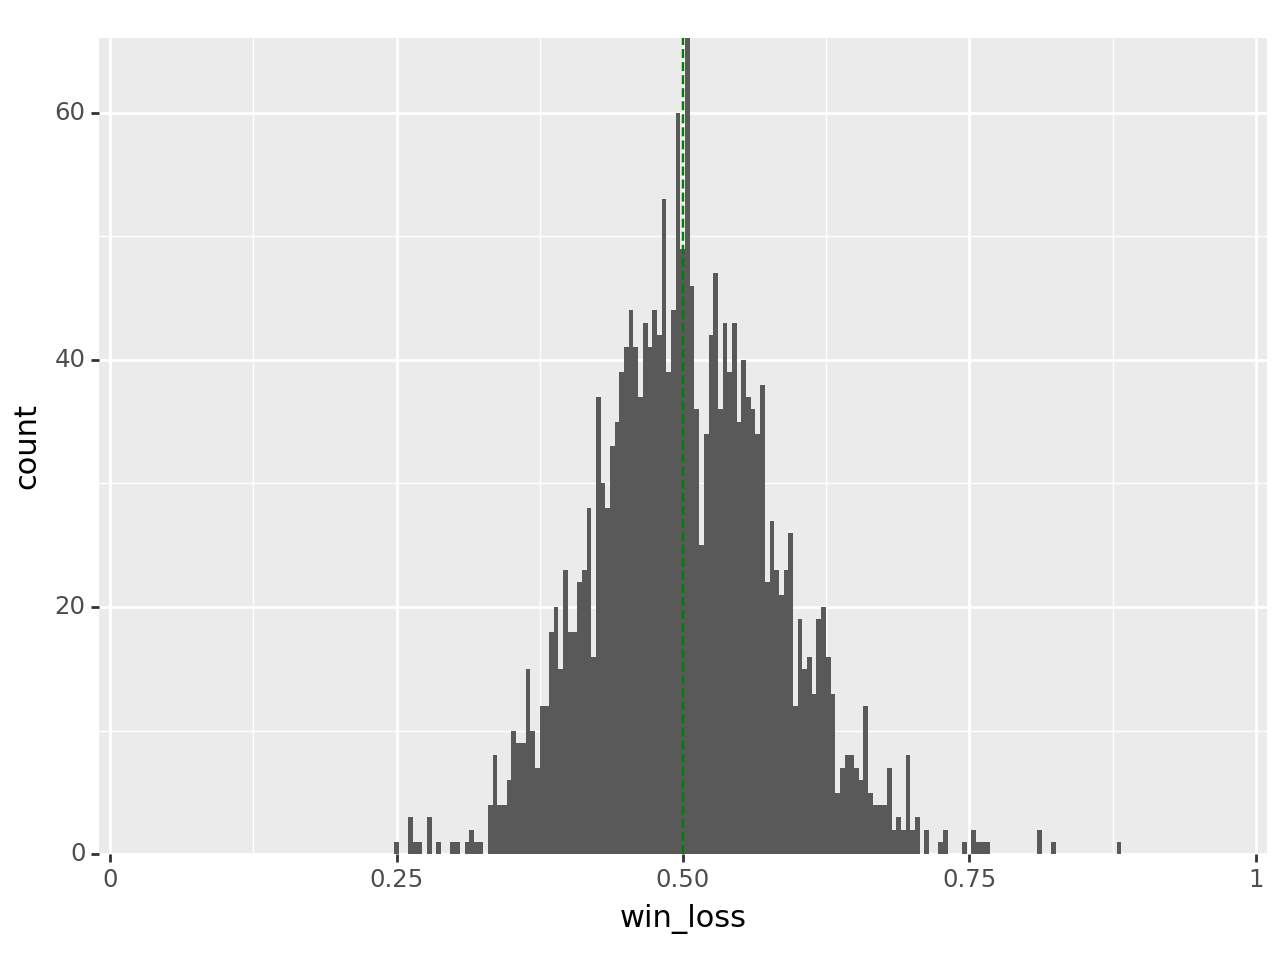

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(scoreboards_res_sum, aes(x = 'win_loss')) +
 geom_histogram(bins = 250) +
 geom_vline(xintercept = 0.50, linetype = 'dashed', color = 'green') +
 scale_x_continuous(limits = [-0.01, 1.01], expand = [0, 0]) +
 scale_y_continuous(expand = [0, 0])
)

Now, let's go ahead and take a look at scatterplots of winrate by average values.

In [ ]:
(ggplot(df_res_sum, aes(x = 'grabs', y = 'win_loss')) +
 geom_point(alpha = 0.5, size = 0.5) +
 scale_y_continuous(limits = [-0.01, 1.01]) +
 labs(x = 'Average number of grabs', y = 'Win/loss ratio', title = '')
)

NameError: name 'df_res_sum' is not defined

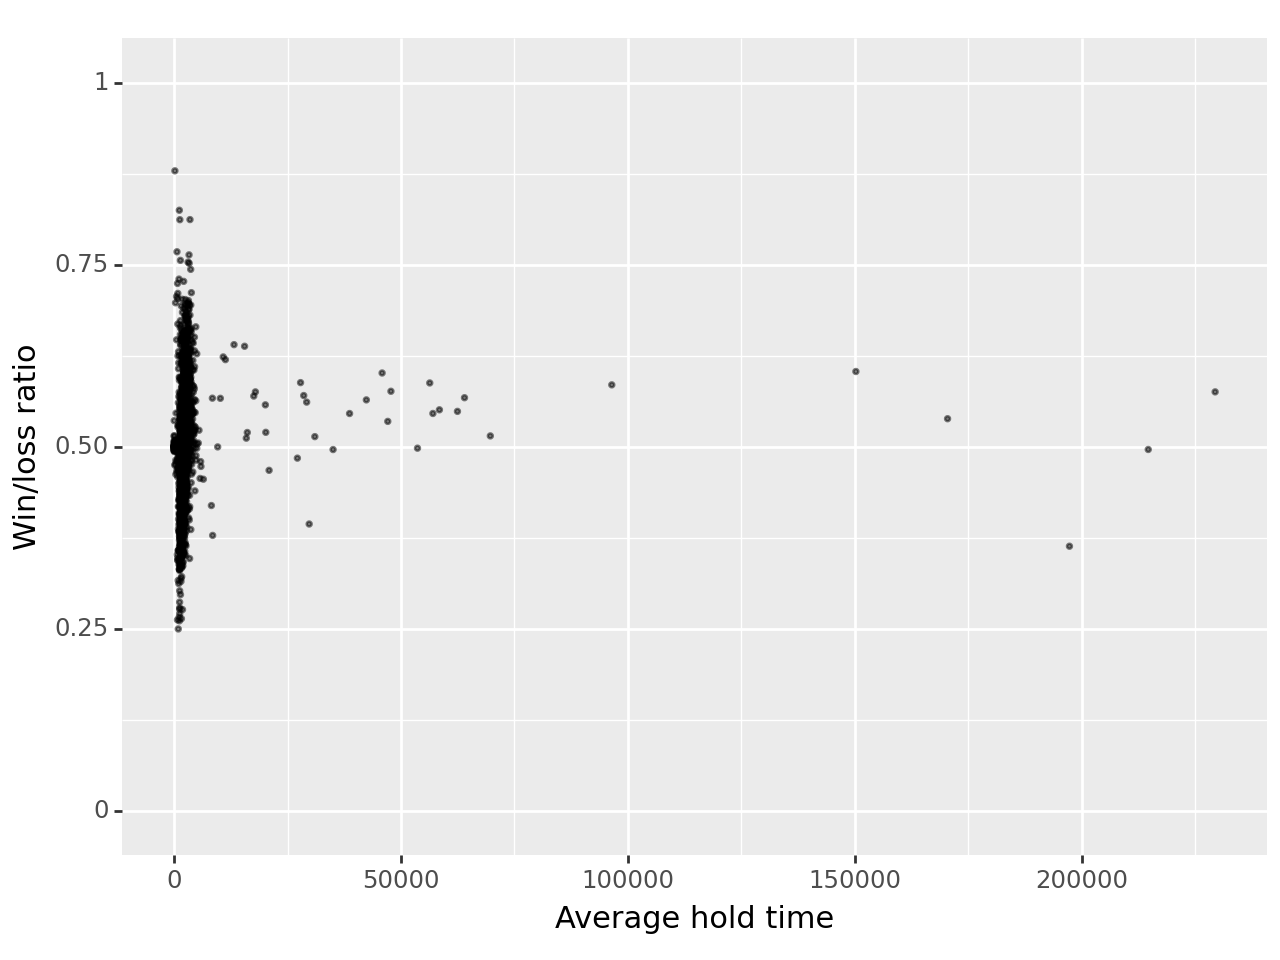

<Figure Size: (640 x 480)>

In [ ]:
# There are some clear outliers here that need to be removed
(ggplot(df_res_sum, aes(x = 'hold_total', y = 'win_loss')) +
 geom_point(alpha = 0.5, size = 0.5) +
 scale_y_continuous(limits = [-0.01, 1.01]) +
 labs(x = 'Average hold time', y = 'Win/loss ratio', title = '')
)

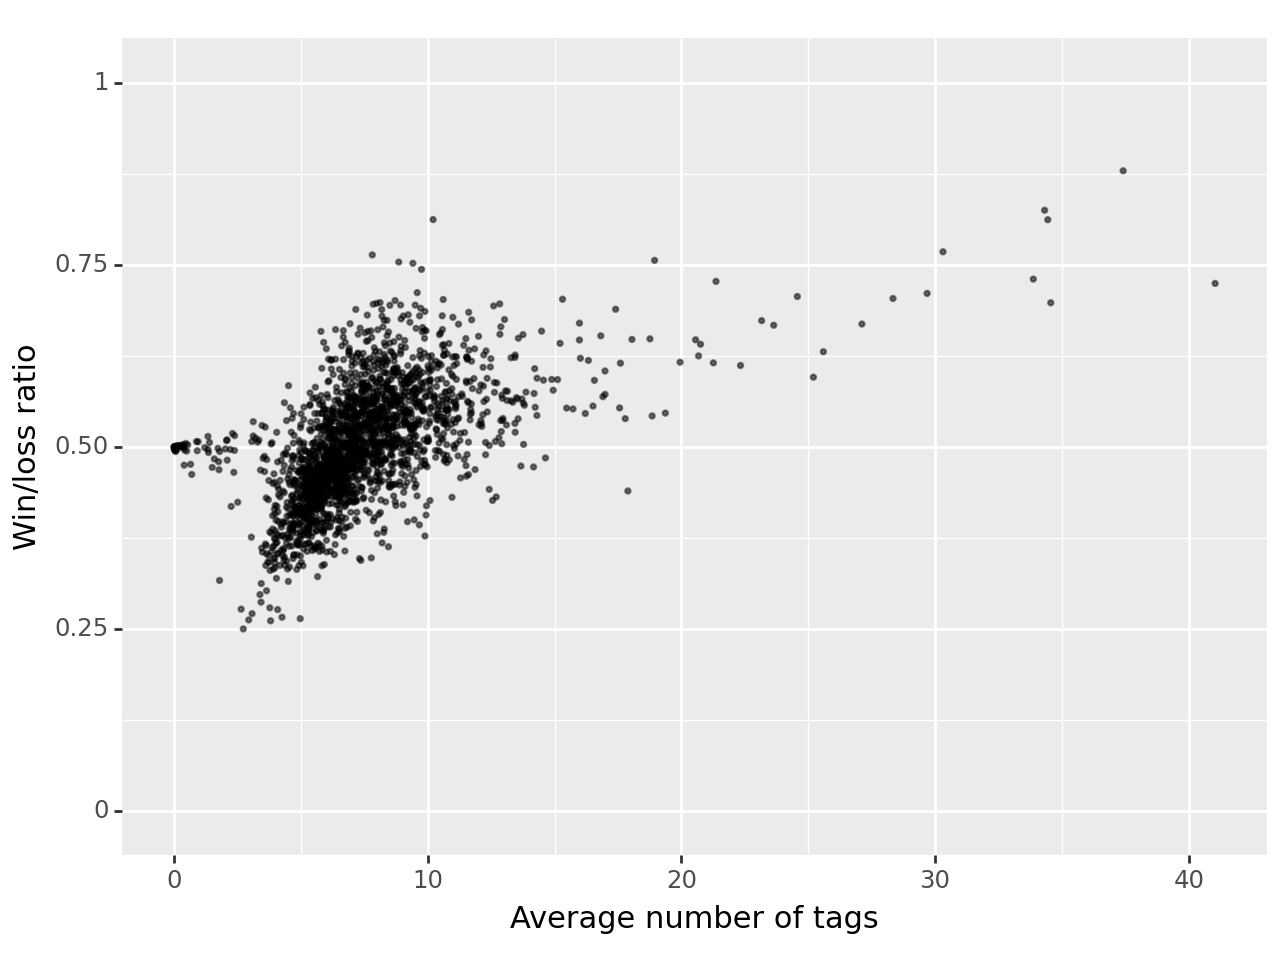

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(df_res_sum, aes(x = 'tags', y = 'win_loss')) +
 geom_point(alpha = 0.5, size = 0.5) +
 scale_y_continuous(limits = [-0.01, 1.01]) +
 labs(x = 'Average number of tags', y = 'Win/loss ratio', title = '')
)

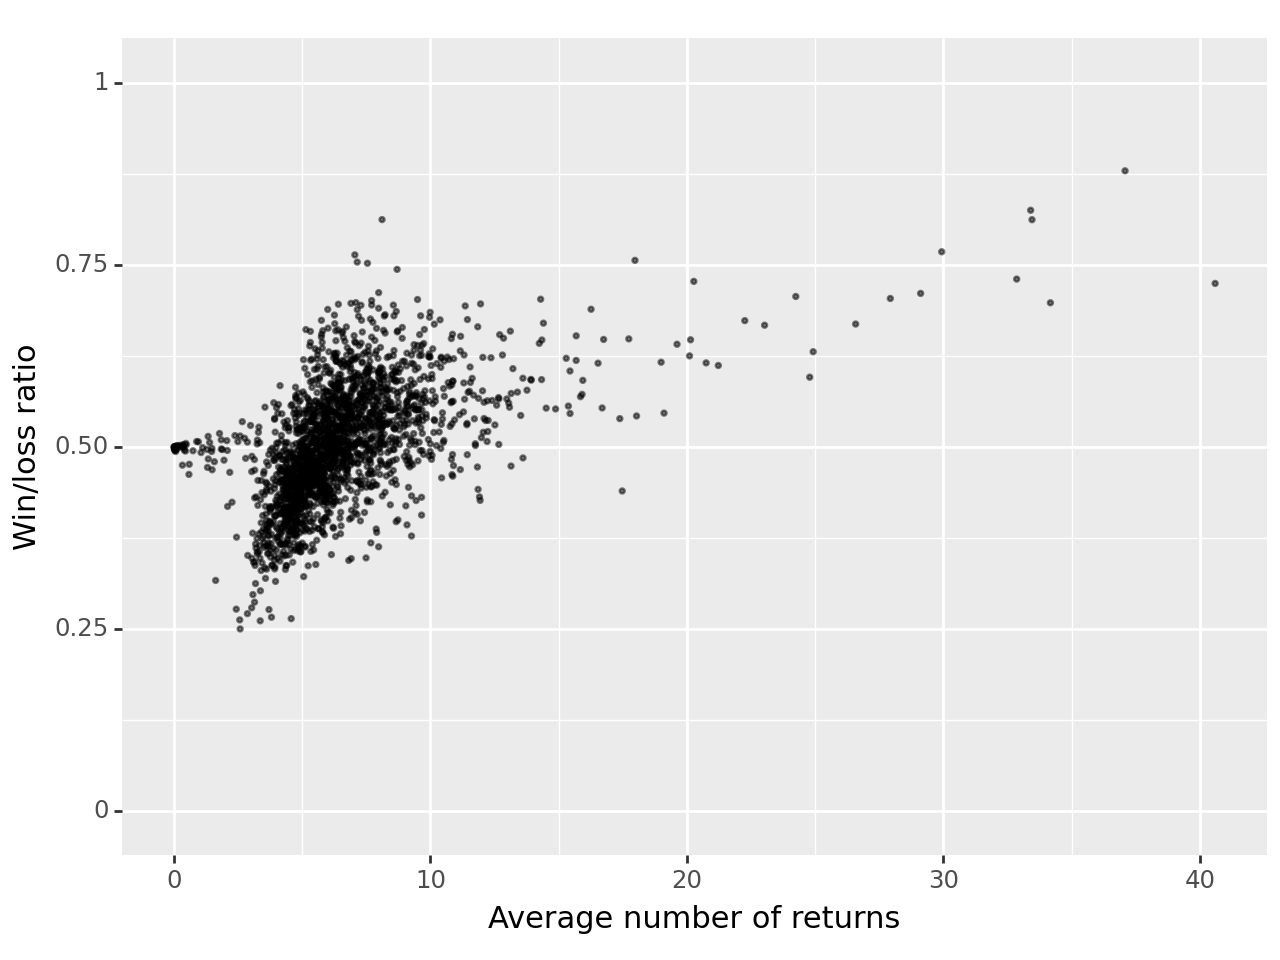

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(df_res_sum, aes(x = 'returns', y = 'win_loss')) +
 geom_point(alpha = 0.5, size = 0.5) +
 scale_y_continuous(limits = [-0.01, 1.01]) +
 labs(x = 'Average number of returns', y = 'Win/loss ratio', title = '')
)

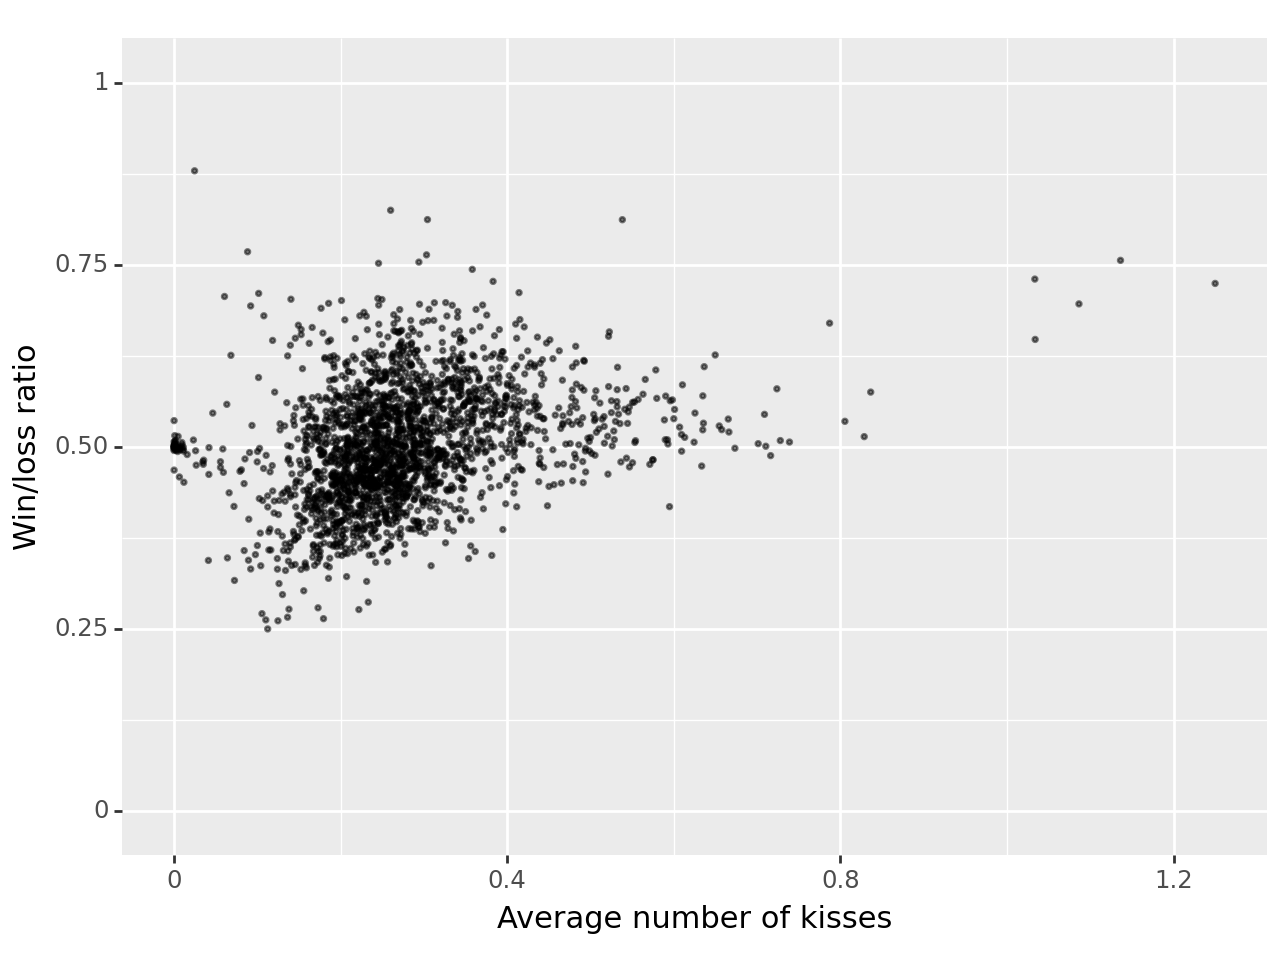

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(df_res_sum, aes(x = 'kisses', y = 'win_loss')) +
 geom_point(alpha = 0.5, size = 0.5) +
 scale_y_continuous(limits = [-0.01, 1.01]) +
 labs(x = 'Average number of kisses', y = 'Win/loss ratio', title = '')
)

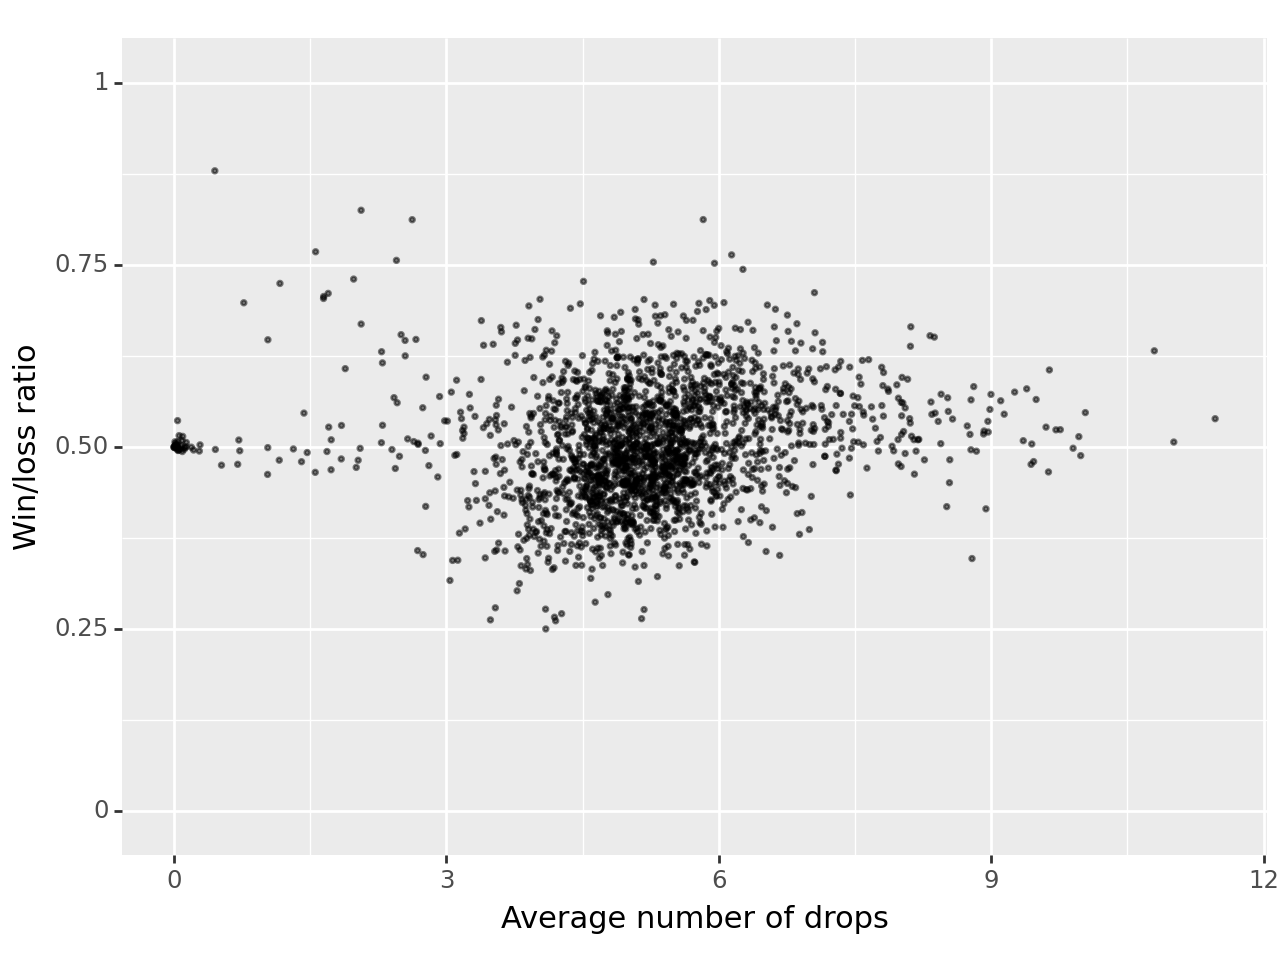

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(df_res_sum, aes(x = 'drops', y = 'win_loss')) +
 geom_point(alpha = 0.5, size = 0.5) +
 scale_y_continuous(limits = [-0.01, 1.01]) +
 labs(x = 'Average number of drops', y = 'Win/loss ratio', title = '')
)

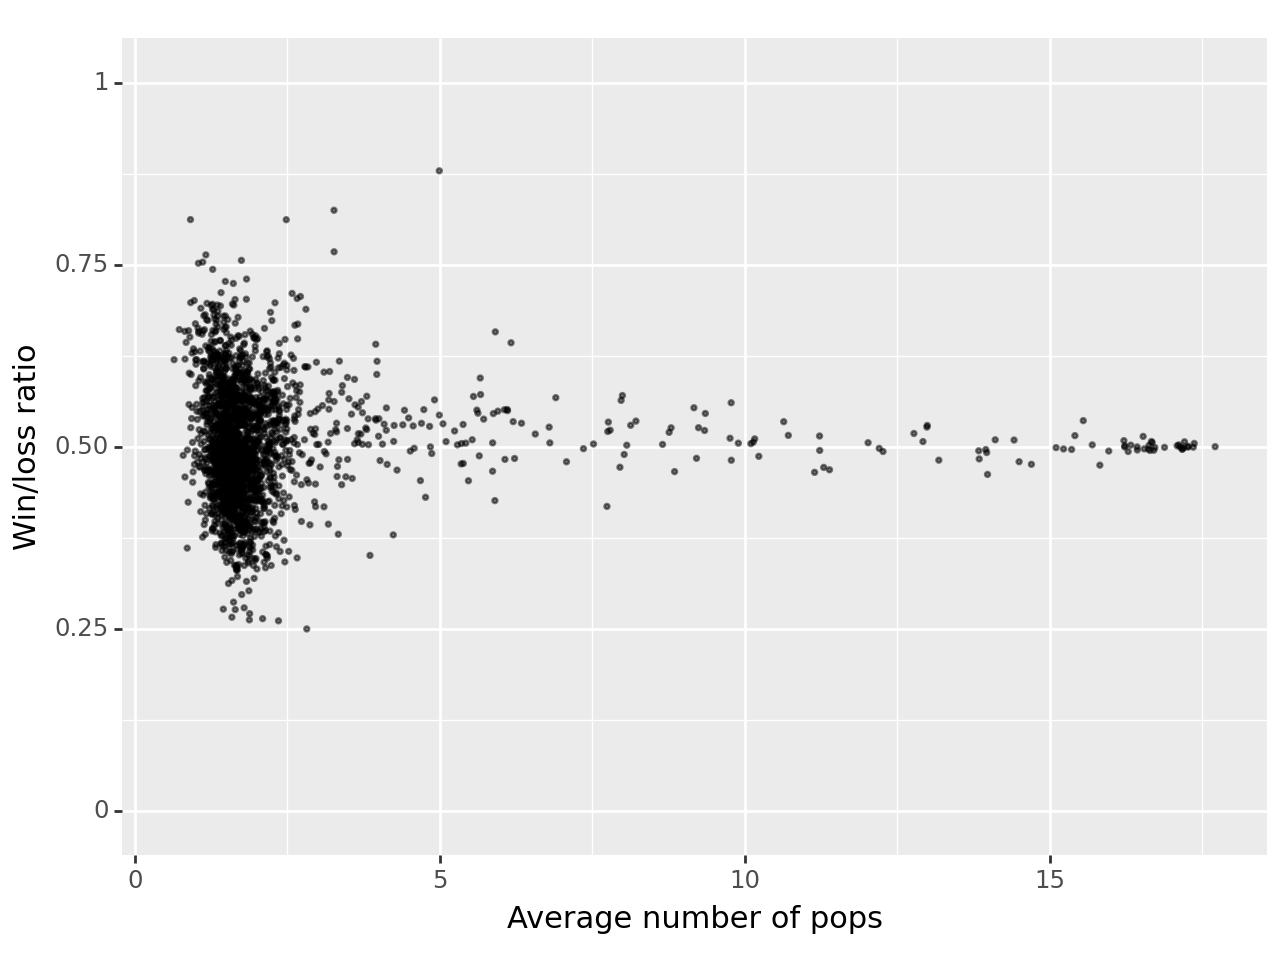

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(df_res_sum, aes(x = 'pops', y = 'win_loss')) +
 geom_point(alpha = 0.5, size = 0.5) +
 scale_y_continuous(limits = [-0.01, 1.01]) +
 labs(x = 'Average number of pops', y = 'Win/loss ratio', title = '')
)

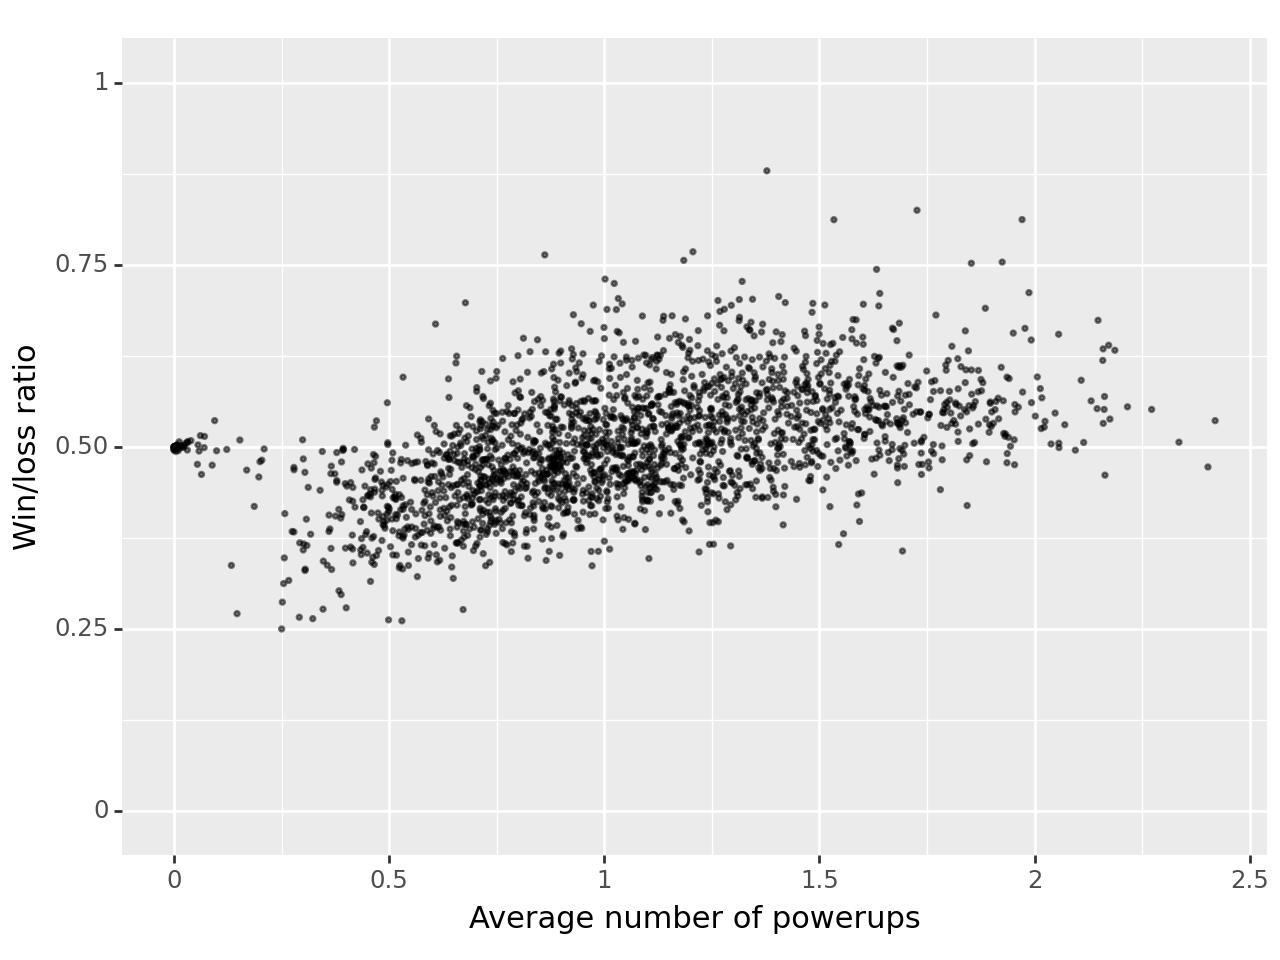

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(df_res_sum, aes(x = 'pups', y = 'win_loss')) +
 geom_point(alpha = 0.5, size = 0.5) +
 scale_y_continuous(limits = [-0.01, 1.01]) +
 labs(x = 'Average number of powerups', y = 'Win/loss ratio', title = '')
)

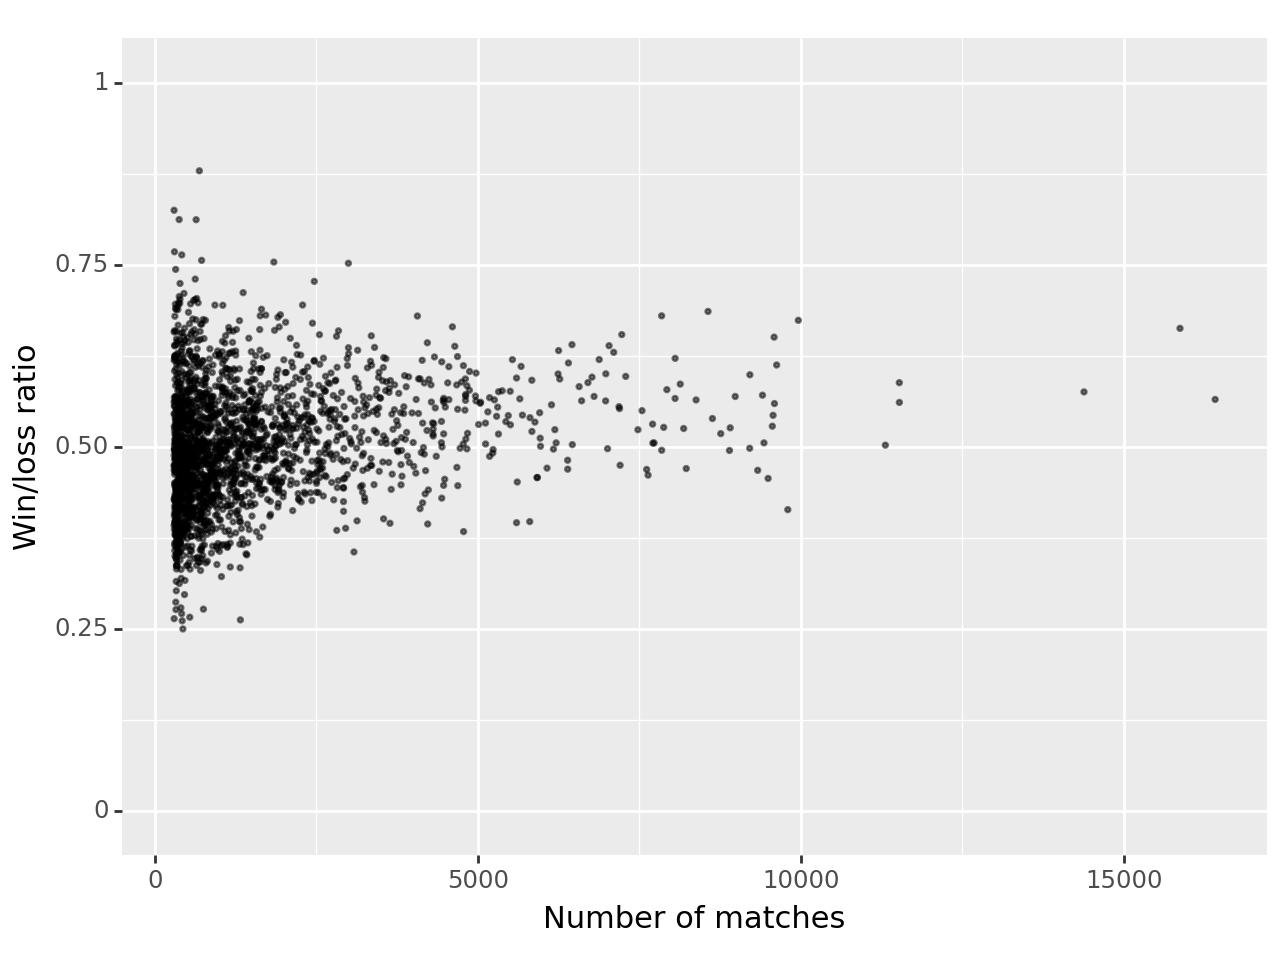

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(df_res_sum, aes(x = 'count_matches', y = 'win_loss')) +
 geom_point(alpha = 0.5, size = 0.5) +
 scale_y_continuous(limits = [-0.01, 1.01]) +
 labs(x = 'Number of matches', y = 'Win/loss ratio', title = '')
)